<a href="https://colab.research.google.com/github/cartmarsh/MachineLearning1/blob/main/RNN_Toxic_comment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with RNNs - Toxic Comment Classification

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

## Download & Explore Data

Outline:
1. Download the data from Kaggle
2. Load data into Pandas dataframes
3. Explore the dataset

In [7]:
import os

In [8]:
os.environ["KAGGLE_CONFIG_DIR"] = "."

In [13]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 99% 52.0M/52.6M [00:01<00:00, 46.2MB/s]
100% 52.6M/52.6M [00:01<00:00, 45.8MB/s]


In [14]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [15]:
import pandas as pd

In [16]:
raw_df = pd.read_csv("data/train.csv.zip")
test_df = pd.read_csv("data/test.csv.zip")
sub_df = pd.read_csv("data/sample_submission.csv.zip")

In [17]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [18]:
raw_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [19]:
raw_df.sample(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
83832,e05dad633aaa9c49,"Please, read again that page, since Pressburg ...",0,0,0,0,0,0
59324,9ef1f3dba61791bd,"""\n\n January 2010 \n Please stop your disrupt...",0,0,0,0,0,0
150690,703cc2bc1c05295f,Please don't. Just as you asked me not to com...,0,0,0,0,0,0
1352,03af7884f5c0e1a4,REDIRECT Talk:George Washington Carver Senior ...,0,0,0,0,0,0
12916,2236737a61b52b0c,The Transporter \n\nNice work.,0,0,0,0,0,0
58675,9d279f87e3a16cd2,I'm not going to collaborate with the non-acad...,0,0,0,0,0,0
13497,239ff19d1c00f594,Not technically a non-sense poem\n\nThe Purple...,0,0,0,0,0,0
69252,b94ac942fd596c7a,I presumed that you changed your mind not beca...,0,0,0,0,0,0
13298,232abb0ee19c69b4,banned by a drunken 5 year old ugly 5 year old...,1,0,0,0,1,0
86124,e66549840c1ed853,"Well, if you look at Talk:Fart, you'll see an ...",0,0,0,0,0,0


In [20]:
target_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [21]:
target_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [22]:
for col in target_cols:
  print(raw_df[col].value_counts(normalize=True))

0    0.904156
1    0.095844
Name: toxic, dtype: float64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
0    0.947052
1    0.052948
Name: obscene, dtype: float64
0    0.997004
1    0.002996
Name: threat, dtype: float64
0    0.950636
1    0.049364
Name: insult, dtype: float64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [23]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [24]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a Vocabulary

In [25]:
from torchtext.data.utils import get_tokenizer

In [26]:
tokenizer = get_tokenizer("basic_english")

In [27]:
sample_comment = raw_df.comment_text.values[0]

In [28]:
sample_comment_tokens = tokenizer(sample_comment)

In [29]:
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [30]:
from torchtext.vocab import build_vocab_from_iterator

In [31]:
comment_tokens = raw_df.comment_text.map(tokenizer)

In [32]:
VOCAB_SIZE = 1500

In [33]:
## for words that are unknown to the vocab
unk_token = "<unk>"

## to pad sentences, because we need the same length for RNNs
pad_token = "<pad>"

In [34]:
vocab = build_vocab_from_iterator(comment_tokens, specials=[unk_token, pad_token],
                                  max_tokens=VOCAB_SIZE)

In [35]:
vocab.set_default_index(vocab[unk_token])

In [36]:
vocab["is"]

12

In [89]:
## vocab.lookup_indices(sample_comment_tokens)


### Create Training & Validation Sets

- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

In [38]:
MAX_LENGTH = 150

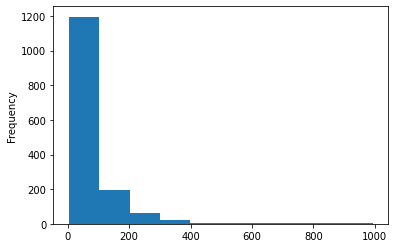

In [39]:
raw_df.comment_text.sample(1500).map(tokenizer).map(len).plot(kind="hist")

In [40]:
from torch.utils.data  import Dataset

In [41]:
def pad_tokens(tokens):
  if(len(tokens) >= MAX_LENGTH):
    return tokens[:MAX_LENGTH]
  else:
    return tokens + [pad_token] *( MAX_LENGTH - len(tokens))

In [42]:
import torch

In [43]:
class JigsawDataset(Dataset):
  def __init__(self, df, is_test=False):
    self.df = df
    self.is_test = is_test
    
  
  def __getitem__(self, index):
    comment_text = self.df.comment_text.values[index]
    comment_tokens = pad_tokens(tokenizer(comment_text))
    input = torch.tensor(vocab.lookup_indices(comment_tokens))
    if self.is_test:
      target = torch.tensor([0,0,0,0,0,0]).float()
    else:
      target = torch.tensor(self.df[target_cols].values[index]).float()
    return input, target

  def __len__(self):
    return len(self.df)

In [44]:
raw_ds = JigsawDataset(raw_df)

In [45]:
raw_ds[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [46]:
from torch.utils.data import random_split

In [47]:
VAL_FRAC = 0.25

In [48]:
train_ds, val_ds = random_split(raw_ds, [1-VAL_FRAC, VAL_FRAC])

In [49]:
len(train_ds)

119679

In [50]:
test_ds = JigsawDataset(test_df, is_test=True)

In [51]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

### Create PyTorch Dataloaders

In [52]:
from torch.utils.data import DataLoader

In [53]:
BATCH_SIZE = 256

In [54]:
train_dl = DataLoader(train_ds, batch_size= BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [55]:
import torch.nn as nn
import torch.functional as F

In [56]:
vocab[pad_token]

1

In [57]:
emb = nn.Embedding(VOCAB_SIZE, 256, 1)

In [58]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [59]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 800 kB 4.7 MB/s 
     |████████████████████████████████| 125 kB 65.3 MB/s 
     |████████████████████████████████| 512 kB 50.9 MB/s 


In [60]:
import pytorch_lightning as pl

In [61]:
import torch.nn.functional as F

In [62]:
import numpy as np

In [63]:
class JigsawModel(pl.LightningModule):
    def __init__(self):
      super().__init__()
      self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
      self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
      self.linear = nn.Linear(128, 6)
      self.learning_rate = 0.001

    def forward(self, x):
      out = self.emb(x)
      out, hn = self.lstm(out)
      out = F.relu(out[:, -1,:])
      out = self.linear(out)
      return out
    def training_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      loss = F.binary_cross_entropy(probs, targets)
      return loss

    def validation_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      loss = F.binary_cross_entropy(probs, targets)
      return loss.item()

    def validation_epoch_end(self, validation_step_outputs):

      loss = np.mean(validation_step_outputs)
      print("Epoch #{}; Loss: {:4f}".format(self.current_epoch, loss))

    def predict_step(self, batch, batch_idx):
      inputs, targets = batch
      outputs = self(inputs)
      probs = torch.sigmoid(outputs)
      return probs

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=self.learning_rate)


In [64]:
model = JigsawModel()

## Train and Evaluate the Model

In [65]:
trainer = pl.Trainer(max_epochs=3, accelerator="gpu", auto_lr_find=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [66]:
trainer.tune(model, train_dl)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.005754399373371567
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_c8d1b58a-169b-4350-aaaf-917c8aee3a00.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_c8d1b58a-169b-4350-aaaf-917c8aee3a00.ckpt


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7f6ab0b2ed90>}

In [67]:
model.learning_rate

0.005754399373371567

In [68]:
trainer.fit(model, train_dl, val_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.707640


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.083170


Validation: 0it [00:00, ?it/s]

Epoch #1; Loss: 0.070674


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.065908


## Make Predictions & Submit

In [69]:
test_preds = trainer.predict(model, test_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [70]:
test_preds = torch.cat(test_preds)

In [71]:
test_preds.shape

torch.Size([153164, 6])

In [72]:
test_probs = torch.sigmoid(test_preds)

In [73]:
sub_df[target_cols] = test_probs.detach().cpu().numpy()

In [74]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.725899,0.572607,0.712417,0.510871,0.678960,0.533305
1,0000247867823ef7,0.502046,0.500014,0.500332,0.500028,0.500334,0.500100
2,00013b17ad220c46,0.521591,0.500247,0.502883,0.500340,0.505179,0.501223
3,00017563c3f7919a,0.503461,0.500011,0.500630,0.500030,0.500505,0.500083
4,00017695ad8997eb,0.511978,0.500078,0.502244,0.500187,0.502125,0.500381
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.532334,0.500164,0.510463,0.500249,0.505692,0.500728
153160,fffd7a9a6eb32c16,0.555305,0.500388,0.507200,0.500794,0.511533,0.501647
153161,fffda9e8d6fafa9e,0.502264,0.500009,0.500346,0.500026,0.500304,0.500074
153162,fffe8f1340a79fc2,0.505311,0.500021,0.500997,0.500071,0.500934,0.500154


In [75]:
sub_df.to_csv("submisson.csv", index=None)

In [76]:
sample_df = raw_df.sample(30)

In [77]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
112543,5a14c277bd82cb55,The details of the efforts to include the film...,0,0,0,0,0,0
146271,29cbbc8f0fd1f92e,"""\n\n Dab, you have to reply! \n\nDab: """"Can e...",0,0,0,0,0,0
1459,03e757afffa84597,|in=Democratic Republic of the Congo,0,0,0,0,0,0
91574,f4de5420d4bcd014,"""\n I also highly suggest that you do not do t...",0,0,0,0,0,0
157266,db3a6665b74bb326,"I've also warned this person, in detail, at se...",0,0,0,0,0,0
98655,0fbf1a15c898ce0e,"""\n Sorry, my comment ended up at the bottom o...",0,0,0,0,0,0
27184,47e983b581f98ae8,"Nice quote, Joegoodfriend (I did laugh a lot.....",0,0,0,0,0,0
157264,db34e75933988aac,"""\n{| style=""""background-color:#F5FFFA; paddin...",0,0,0,0,0,0
121615,8aa55e3620ec522e,Please refrain from adding nonsense to Wikiped...,0,0,0,0,0,0
74244,c69fc3d572bf1e73,"""\nWell, he's been a rather contributory edito...",0,0,0,0,0,0


In [ ]:
print(type(sample_df))
print(sample_df.info())

In [78]:
sample_ds = JigsawDataset(sample_df)

In [79]:
sample_dl = DataLoader(sample_ds, batch_size=30)

In [80]:
sample_preds = trainer.predict(model, sample_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [111]:
print(sample_probs)

tensor([[0.5015, 0.5000, 0.5002, 0.5000, 0.5002, 0.5001],
        [0.5270, 0.5002, 0.5042, 0.5002, 0.5050, 0.5009],
        [0.5143, 0.5001, 0.5036, 0.5001, 0.5027, 0.5005],
        [0.5044, 0.5000, 0.5004, 0.5001, 0.5009, 0.5003],
        [0.5027, 0.5000, 0.5004, 0.5000, 0.5004, 0.5001],
        [0.5010, 0.5000, 0.5002, 0.5000, 0.5002, 0.5000],
        [0.5028, 0.5000, 0.5005, 0.5000, 0.5005, 0.5001],
        [0.5019, 0.5000, 0.5005, 0.5000, 0.5007, 0.5002],
        [0.5025, 0.5000, 0.5003, 0.5000, 0.5004, 0.5001],
        [0.5015, 0.5000, 0.5004, 0.5000, 0.5003, 0.5001],
        [0.5188, 0.5001, 0.5021, 0.5005, 0.5044, 0.5007],
        [0.5030, 0.5000, 0.5005, 0.5000, 0.5004, 0.5001],
        [0.5010, 0.5000, 0.5002, 0.5000, 0.5001, 0.5000],
        [0.5420, 0.5004, 0.5069, 0.5006, 0.5103, 0.5017],
        [0.5024, 0.5000, 0.5002, 0.5000, 0.5005, 0.5002],
        [0.5690, 0.5004, 0.5101, 0.5012, 0.5172, 0.5023],
        [0.5019, 0.5000, 0.5003, 0.5000, 0.5003, 0.5001],
        [0.502

In [81]:
sample_probs = torch.sigmoid(sample_preds[0])


In [82]:
(sample_probs > 0.55).int()

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [83]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
112543,5a14c277bd82cb55,The details of the efforts to include the film...,0,0,0,0,0,0
146271,29cbbc8f0fd1f92e,"""\n\n Dab, you have to reply! \n\nDab: """"Can e...",0,0,0,0,0,0
1459,03e757afffa84597,|in=Democratic Republic of the Congo,0,0,0,0,0,0
91574,f4de5420d4bcd014,"""\n I also highly suggest that you do not do t...",0,0,0,0,0,0
157266,db3a6665b74bb326,"I've also warned this person, in detail, at se...",0,0,0,0,0,0
98655,0fbf1a15c898ce0e,"""\n Sorry, my comment ended up at the bottom o...",0,0,0,0,0,0
27184,47e983b581f98ae8,"Nice quote, Joegoodfriend (I did laugh a lot.....",0,0,0,0,0,0
157264,db34e75933988aac,"""\n{| style=""""background-color:#F5FFFA; paddin...",0,0,0,0,0,0
121615,8aa55e3620ec522e,Please refrain from adding nonsense to Wikiped...,0,0,0,0,0,0
74244,c69fc3d572bf1e73,"""\nWell, he's been a rather contributory edito...",0,0,0,0,0,0


# Get tweets from twitter

## Transform data
## make predictions

In [212]:
!pip install tweepy==4.1.0
!pip install python-dotenv
!pip install textblob
!pip install wordcloud
!pip install better_profanity
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
4.1.0
Please enter your topic / person of interest: Russia


In [258]:
consumer_key = 'zio1RuQkbDRQRWRAYSouCUTcA'
consumer_secret = 'i59mUtrPSdht7vyzqhjlR5aXfTPbrM87jWLU3nyzqynvXZhpAN' 
access_token = '840693273345822720-ayREUxWOdjtDK0Wb2KTuV3Gfaqkyd3v'
access_token_secret = 'EvAnzpsBxEMim7CEj7kRoxZGKS7RMK9OKGNYJVRKe5RHv'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

print(tweepy.__version__)


4.1.0


In [261]:
# configurations

num_tweets = 10

In [262]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# In this case, we will input the query as 'Elon Musk'

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, 
                           q=filtered,
                           lang="en").items(num_tweets)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

Please enter your topic / person of interest: music


TooManyRequests: ignored

In [257]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [ ]:
tweet_list[:10]

In [ ]:
def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [ ]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned[:10]

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
tweets_df = np.array(cleaned)

In [ ]:
tweets_df.shape

In [ ]:
tweets_df[:10]

In [ ]:
column_values= ["comment_text"]

In [ ]:
tweets_df = pd.DataFrame(data=tweets_df, columns=column_values )

In [ ]:
len(tweets_df)

In [ ]:
tweets_df.head

In [ ]:
jig_tweets = JigsawDataset(tweets_df, is_test=True)

In [ ]:
jig_tweets

In [ ]:
jig_tweets_dl = DataLoader(jig_tweets, batch_size=num_tweets)

In [ ]:
jig_tweets_preds = trainer.predict(model, jig_tweets_dl)

In [ ]:
jig_tweets_probs = torch.sigmoid(jig_tweets_preds[0])

In [ ]:
print( len(jig_tweets_probs))

In [ ]:
jig_tweets_int = (jig_tweets_probs > 0.55).int()

In [ ]:
print( len(jig_tweets_int))

In [ ]:
print(jig_tweets_int[:20])

In [ ]:
target_cols

In [ ]:
tweets_df[target_cols] = jig_tweets_int.detach().cpu().numpy()

In [ ]:
len(jig_tweets_int.detach().cpu().numpy())

In [ ]:
tweets_df["comment_text"][0] 

In [ ]:
tweets_df.info

In [ ]:
non_zero_tweets = tweets_df[target_cols] > 0

In [ ]:
non_zero_tweets

In [ ]:
type(tweets_df)

In [ ]:
# all toxic statements

all_toxic = []
all_threat = []
all_insult = []
all_identity_hate = []

for index, row in tweets_df.iterrows():
    
    if row.toxic == 1:
      all_toxic.append(tweet_list[index])
      
    if row.threat == 1:
      all_threat.append(tweet_list[index])
      
    if row.insult == 1:
      all_insult.append(tweet_list[index])
      
    if row.identity_hate == 1:
      all_identity_hate.append(tweet_list[index])
      

In [ ]:
all_toxic

In [ ]:
all_threat

In [ ]:
all_insult

In [ ]:
all_identity_hate